In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # for regex
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle

In [40]:
movie_review=pd.read_csv("IMDB-Dataset.csv")

In [41]:
movie_review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [42]:
movie_review.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [43]:
movie_review.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [44]:
movie_review.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [45]:
import seaborn as sns

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

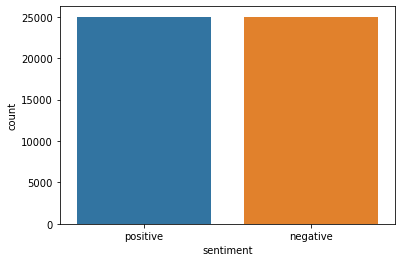

In [46]:
sns.countplot(movie_review["sentiment"],data=movie_review)

In [47]:
movie_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [48]:
movie_review.dtypes

review       object
sentiment    object
dtype: object

In [49]:
movie_review["sentiment"]=movie_review["sentiment"].replace("positive","1")

In [50]:
movie_review["sentiment"]=movie_review["sentiment"].replace("negative","0")

In [51]:
movie_review.sentiment.values

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [52]:
def remove_html(text):
    clean=re.compile(r'<.*?>')
    return re.sub(clean,' ',text)

movie_review.review=movie_review.review.apply(remove_html)
movie_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming t...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [53]:
def is_special(text):
    rem = ''
    for let in text:
        if let.isalnum():
            let = let + i
        else:
            let = let + ' '
    return let

movie_review.review = movie_review.review.apply(is_special)
movie_review.review

0        One of the other reviewers has mentioned that ...
1        A wonderful little production    The filming t...
2        I thought this was a wonderful way to spend ti...
3        Basically there s a family where a little boy ...
4        Petter Mattei s  Love in the Time of Money  is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot  bad dialogue  bad acting  idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I m going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [54]:
def lower_case(text):
    return text.lower()

movie_review.review=movie_review.review.apply(lower_case)
movie_review


,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming t...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there s a family where a little boy ...,0
4,petter mattei s love in the time of money is...,1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,bad plot bad dialogue bad acting idiotic di...,0
49997,i am a catholic taught in parochial elementary...,0
49998,i m going to have to disagree with the previou...,0


In [55]:
def rmv_stop(text):
    stop_words=set(stopwords.words("english"))
    words=word_tokenize(text)
    return [ i for i in words if i not in stop_words]



In [56]:
movie_review.review=movie_review.review.apply(rmv_stop)
movie_review

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, family, little, boy, jake, thinks,...",0
4,"[petter, mattei, love, time, money, visually, ...",1
...,...,...
49995,"[thought, movie, right, good, job, creative, o...",1
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",0
49997,"[catholic, taught, parochial, elementary, scho...",0
49998,"[going, disagree, previous, comment, side, mal...",0


In [57]:
def stem_words(text):
    words = SnowballStemmer('english')
    return " ".join([words.stem(i) for i in text])

movie_review.review = movie_review.review.apply(stem_words)
movie_review.review

0        one review mention watch 1 oz episod hook righ...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job creativ origin fir...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    go disagre previous comment side maltin one se...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

In [61]:
X=np.array(movie_review.iloc[:,0].values)
Y=np.array(movie_review.sentiment.values)
model=CountVectorizer(max_features = 1000)
X = model.fit_transform(movie_review.review).toarray()

print(X.shape)
print(Y.shape)

(50000, 1000)
(50000,)


In [62]:
trainx,testx,trainy,testy=train_test_split(X,Y,test_size=0.2,random_state=9)
print("Train shapes : X = {}, y = {}".format(trainx.shape,trainy.shape))
print("Test shapes : X = {}, y = {}".format(testx.shape,testy.shape))

Train shapes : X = (40000, 1000), y = (40000,)
Test shapes : X = (10000, 1000), y = (10000,)


In [63]:
bn=BernoulliNB(alpha=1.0,fit_prior=True)
bn.fit(trainx,trainy)

BernoulliNB()

In [64]:
pred=bn.predict(testx)

In [65]:
print("Bernoulli = ",accuracy_score(testy,pred))

Bernoulli =  0.8388


In [67]:
pickle.dump(bn,open('model11111.pkl','wb'))